In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
!conda install -c conda-forge folium=0.5.0
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

Solving environment: done

# All requested packages already installed.



In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fd46c81196f64c0a97318ffa0977f0bc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KBW0uwGl87LieY87INww3Jj_AHjYhMQ5_AEFBC1nE5Va',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fd46c81196f64c0a97318ffa0977f0bc.get_object(Bucket='capstoneweek5-donotdelete-pr-qy1toq0ixpu51t',Key='ban.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [6]:
df = df_data_0

In [7]:
df

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [10]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [11]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [12]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [13]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [14]:
CLIENT_ID = '1VNPCLWNGAR3LNSXGTNB2WLNAN0ZDA24HU41I4RJWZSUMKQV'
CLIENT_SECRET = 'TQNIUBYEX0FCGQIGVNBJ0MDDVRKDQKM220323WDIHJFZ0KQ0'
VERSION = '20180606'
LIMIT = 150

In [15]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [16]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [17]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [18]:
borough_colors

{'Central': '#A4C0B8',
 'Eastern': '#B1C1AD',
 'NorthEastern': '#E71831',
 'Northern': '#9EF85D',
 'SouthEastern': '#942F10',
 'Southern': '#EDB527',
 'SouthernSuburbs': '#50D175',
 'Western': '#691ED7'}

In [19]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [20]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [21]:
bangalore_map

# Exploring bangalore Neighborhoods using FourSquare API

In [22]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [23]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [24]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  591


In [25]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [26]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       113
Café                     34
Fast Food Restaurant     30
Bakery                   24
Ice Cream Shop           21
Pizza Place              18
Department Store         17
Chinese Restaurant       15
Coffee Shop              15
Hotel                    12
Name: Neighborhood, dtype: int64

In [27]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  133


# Getting number of venues per neighborhood

In [28]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [29]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     12
                Indiranagar                68
                Jeevanbheemanagar           4
                Malleswaram                 6
                Pete area                   5
                Rajajinagar                11
                Sadashivanagar             22
                Seshadripuram               9
                Shivajinagar               11
                Ulsoor                      4
                Vasanth Nagar              26
Eastern         Bellandur                  23
                CV Raman Nagar              7
                Hoodi                       4
                Krishnarajapuram            3
                Mahadevapura                5
                Marathahalli                8
                Varthur                     1
                Whitefield                  9
NorthEastern    Banaswadi                   7
                HBR Layout                  5
                Horamavu                    3
                Kammanahalli               11
                Lingarajapuram              3
                Ramamurthy Nagar            5
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  12
                R. T. Nagar                 8
...                                       ...
                Yeshwanthpur                9
SouthEastern    BTM Layout                 34
                Bommanahalli                4
                Electronic City             5
                HSR Layout                 10
                Koramangala                 7
                Madiwala                   22
Southern        Banashankari               11
                Basavanagudi               10
                Girinagar                   4
                J. P. Nagar                26
                Jayanagar                  14
                Kumaraswamy Layout         11
                Padmanabhanagar             3
                Uttarahalli                12
SouthernSuburbs Anjanapura                  1
                Arekere                    26
                Begur                       4
                Gottigere                   5
                Hulimavu                    4
                Kothnur                     4
Western         Basaveshwaranagar          17
                Kamakshipalya               3
                Kengeri                     3
                Mahalakshmi Layout         11
                Nagarbhavi                  6
                Nandini Layout              1
                Nayandahalli                2
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

[62 rows x 1 columns]

In [30]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [31]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [32]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,12
2,Central,Indiranagar,68
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
5,Central,Pete area,5
6,Central,Rajajinagar,11
7,Central,Sadashivanagar,22
8,Central,Seshadripuram,9
9,Central,Shivajinagar,11


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Electron

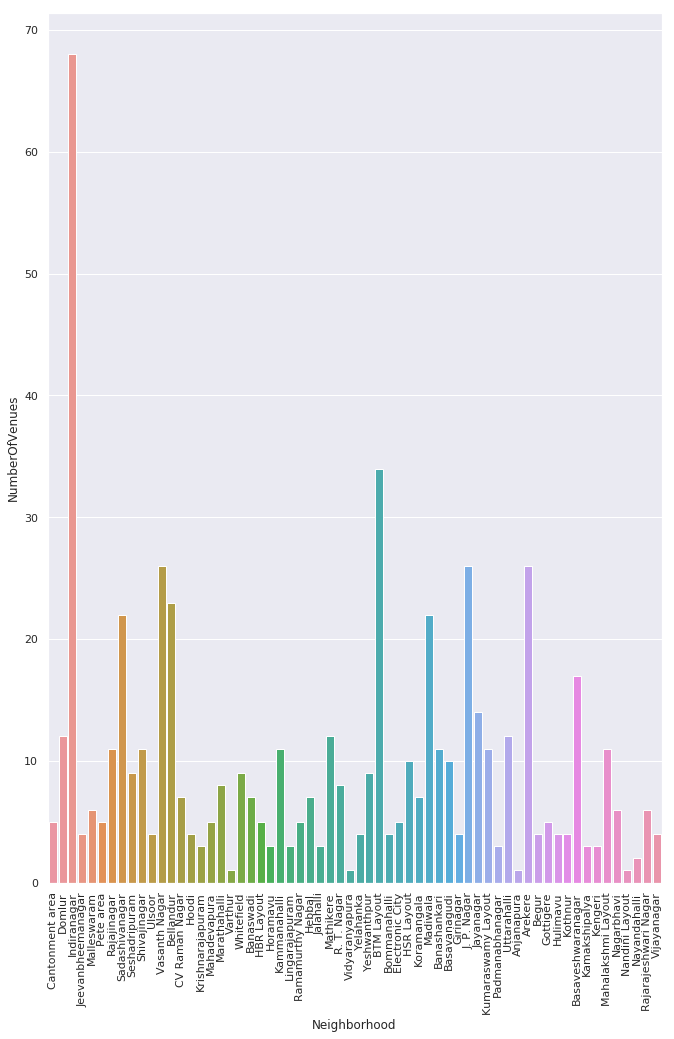

In [33]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that inderanagar has most number of venues and soo on...

In [34]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
234,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
235,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
236,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
237,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
238,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
239,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
240,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
241,Whitefield,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant
242,Whitefield,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café


## One hot encoding for letting us to compare different venues

In [35]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [36]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Arekere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,BTM Layout,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.058824,0.000000,0.000000,0.00
3,Banashankari,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Banaswadi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.00
5,Basavanagudi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Basaveshwaranagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Begur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,Bellandur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Bommanahalli,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [38]:
number_of_top_venues = 5

In [39]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                          Venue  Frequency
0                            Venue Category_ATM        1.0
1      Venue Category_Middle Eastern Restaurant        0.0
2          Venue Category_Performing Arts Venue        0.0
3                           Venue Category_Park        0.0
4  Venue Category_Paper / Office Supplies Store        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.19
1  Venue Category_Sporting Goods Shop       0.12
2     Venue Category_Department Store       0.08
3          Venue Category_Pizza Place       0.08
4             Venue Category_Bus Line       0.04


--------- BTM Layout ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.21
1                    Venue Category_Snack Place       0.09
2                 Venue Category_Ice Cream Shop       0.09
3  Venue Category_Vege

                                          Venue  Frequency
0           Venue Category_Fast Food Restaurant       0.50
1                    Venue Category_Pizza Place       0.25
2      Venue Category_Middle Eastern Restaurant       0.25
3                           Venue Category_Park       0.00
4  Venue Category_Paper / Office Supplies Store       0.00


--------- Kamakshipalya ---------
                               Venue  Frequency
0                 Venue Category_ATM       0.67
1        Venue Category_Home Service       0.33
2        Venue Category_Neighborhood       0.00
3  Venue Category_Miscellaneous Shop       0.00
4     Venue Category_Motorcycle Shop       0.00


--------- Kammanahalli ---------
                                 Venue  Frequency
0  Venue Category_Fast Food Restaurant       0.18
1           Venue Category_Snack Place       0.09
2    Venue Category_Chinese Restaurant       0.09
3     Venue Category_Andhra Restaurant       0.09
4          Venue Category_Burger Join

                                    Venue  Frequency
0        Venue Category_Indian Restaurant       0.45
1               Venue Category_Donut Shop       0.09
2  Venue Category_South Indian Restaurant       0.09
3                   Venue Category_Market       0.09
4     Venue Category_Fast Food Restaurant       0.09


--------- Ulsoor ---------
                               Venue  Frequency
0                Venue Category_Café       0.50
1        Venue Category_Burger Joint       0.25
2              Venue Category_Bakery       0.25
3  Venue Category_Miscellaneous Shop       0.00
4     Venue Category_Motorcycle Shop       0.00


--------- Uttarahalli ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.33
1                Venue Category_Bakery       0.17
2      Venue Category_Department Store       0.08
3       Venue Category_Paintball Field       0.08
4  Venue Category_Fast Food Restaurant       0.08


--------- Varthur ---------
 

In [40]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [41]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Flea Market,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Fast Food Restaurant,Venue Category_Park
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Yoga Studio
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Grocery Store,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Bakery,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,Venue Category_Eastern European Restaurant,Venue Category_Donut Shop,Venue Category_Diner


In [42]:
neighborhoods_venues_sorted.shape

(62, 11)

## Next we need to find the optimal k value for clustering

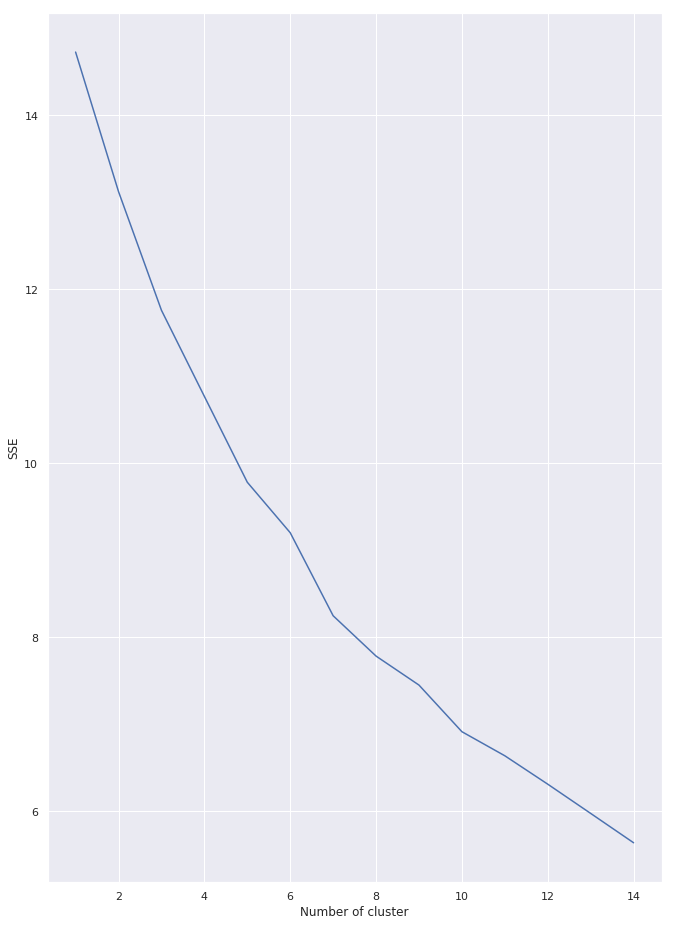

In [43]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [44]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [45]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [46]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [47]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     6
1    25
2     8
3    13
4    10
Name: Neighborhood, dtype: int64

In [48]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Arts & Crafts Store',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       ...
       'Venue Category_Tea Room', 'Venue Category_Tex-Mex Restaurant',
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=135)

In [49]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [50]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Flea Market,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,Venue Category_Business Service,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,1
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4


In [51]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [52]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [53]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [54]:
map_clusters

# Finding similar locations based on user input (Recommending location)

### We need to analyze factors such as population and Income to recommend.

In [55]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [56]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [57]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [58]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [59]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Recommending Veg restaurants

In [60]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    2
24    0
25    0
26    0
27    0
28    0
29    0
     ..
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    1
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    1
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [62]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [63]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [64]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [65]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [66]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [67]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

## Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [68]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [69]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,569,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,570,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,571,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,572,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,573,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,574,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
6,575,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
7,576,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant
8,577,Whitefield,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,Venue Category_Kerala Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café


In [70]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [71]:
target_cluster

4

In [72]:
print("The target cluster is : ",target_cluster)

The target cluster is :  4


In [73]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
61,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,0.0,0.0,4,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
62,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,0.0,0.0,4,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
63,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,0.0,0.0,4,Southern,12.9255,77.5468,Reliance Trends,12.926891,77.551068,Clothing Store
64,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,0.0,0.0,4,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
65,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,0.0,0.0,4,Southern,12.9255,77.5468,Max,12.924993,77.550634,Accessories Store


In [74]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 69 neighborhoods which has similar characteristics to Whitefield.


In [75]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,61,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
1,62,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
2,63,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,Reliance Trends,12.926891,77.551068,Clothing Store
3,64,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
4,65,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,Max,12.924993,77.550634,Accessories Store


In [76]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Now we need to create ranking by combining population and income factors as well

In [77]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [78]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,Anna Kuteera,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.209528,0.889855,0,1.0
1,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,cafe coffee day,12.924896,77.545873,Café,810407,0.823908,57524.209528,0.889855,0,1.0
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,Reliance Trends,12.926891,77.551068,Clothing Store,810407,0.823908,57524.209528,0.889855,0,1.0
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,Pizza Hut,12.924959,77.550755,Pizza Place,810407,0.823908,57524.209528,0.889855,0,1.0
4,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Fast Food Restaurant,Venue Category_Sporting Goods Shop,...,Max,12.924993,77.550634,Accessories Store,810407,0.823908,57524.209528,0.889855,0,1.0


In [79]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [80]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Paper / Office Supplies Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Snack Place,Venue Category_Yoga Studio,...,12.993448,77.550643,Park,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
1,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Paper / Office Supplies Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Snack Place,Venue Category_Yoga Studio,...,12.987432,77.549813,Snack Place,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
2,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Paper / Office Supplies Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Snack Place,Venue Category_Yoga Studio,...,12.991578,77.554561,Bakery,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
3,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Paper / Office Supplies Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Snack Place,Venue Category_Yoga Studio,...,12.987669,77.549978,Bakery,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
4,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Paper / Office Supplies Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Snack Place,Venue Category_Yoga Studio,...,12.987441,77.549826,Bakery,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947


In [81]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [82]:
top3_df = pd.DataFrame(top3).reset_index()

In [83]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Accessories Store,[0.8234029969357847]
1,Gottigere,Venue Category_Indian Restaurant,Venue Category_Pharmacy,Venue Category_Department Store,[0.43352975051479636]
2,HSR Layout,Venue Category_Badminton Court,Venue Category_Pizza Place,Venue Category_Café,[0.6193945016263558]


### Here, according to the model and data, we see that 'Banashankari, Gottigere, HSR Layout ' are top 3 neighborhoods to find similar food to whitefield  veg food restaurants